In [676]:
from IPython.display import SVG, display
import yaml

In [677]:
#####------------------------------------------#####

In [678]:
#canvas = yaml.safe_load(open("quantum.circuit.param.definitions.yaml"))

In [679]:
class QuantumCircuit():
    def __init__(self, *args, **kwargs):
        self.N = args[0]
        self.canvas = yaml.safe_load(open("quantum.circuit.param.definitions.yaml"))
        self.D = self.canvas['axis']['y-gap']  # Y Axis Gap
        self.L = self.canvas['axis']['x-gap']  # X Axis Gap
        #Set Origin
        self.x0 = int(self.L/2)
        self.y0 =  self.D
        #Set Canvas Height and Width
        self.H = int(self.D*(self.N  + 1 ))
        self.W = self.L
        # Set canvas background
        print(self.x0, self.y0)
        self.BG_COLOR = self.canvas['background-color']
        # Define circuit reference matrix/dictionary
        #self.SVG_STRING_DICT = {i: {0: f'<line x1="{x0}" y1="{y1+(i+1)*self.D}" x2="{x0+L}" y2="{y0+(i+1)*self.D}" stroke="black" stroke-width="2"/>'} for i in range(self.N)}
        
        self.SVG_STRING_LIST = list() 
        wire_stroke = self.canvas['wire']['stroke']
        wire_stroke_width = self.canvas['wire']['stroke-width']
        for i in range(self.N):
            x1, y1 = int(self.x0), int(self.y0+ i*self.D)
            x2, y2 = int(self.x0+L), int(self.y0+i*self.D)
            print(f"x1={x1}, y1={y1}, x2 ={x2}, y2={y2}")
            wire = f'''<text x="{x1}" y="{y1-10/2}" fill="black" font-size="10" font-weight="bold">q_{i}</text>
                       <line x1="{x1}" y1="{y1}" x2="{x2}" y2="{y2}" stroke="{wire_stroke}" stroke-width="{wire_stroke_width}"/>
                       '''
            
            self.SVG_STRING_LIST.append(wire)

        self.W +=L
        self.x0+= int(L/2)


    def _wires(self):
        wire_stroke = self.canvas['wire']['stroke']
        wire_stroke_width = self.canvas['wire']['stroke-width']
        for i in range(self.N):
            x1, y1 = int(self.x0), int(self.y0+ i*self.D)
            x2, y2 = int(self.x0+L), int(self.y0+i*self.D)
            wire = f' <line x1="{x1}" y1="{y1}" x2="{x2}" y2="{y2}" stroke="{wire_stroke}" stroke-width="{wire_stroke_width}"/>'
            
            self.SVG_STRING_LIST.append(wire)

        self.W +=self.L
        self.x0+= int(self.L/2)
        

    def single_qubit_gate(self, gates:list, qubit_positions:list):
        if not all([isinstance(pos, int) for pos in qubit_positions]):
            raise TypeError("One or more of element(s) in argument <<qubit_position>> is 'Not Integer' Type") 
        if not all([isinstance(g, str) for g in gates]):
            raise TypeError("One or more of element(s) in argument <<gates>> is 'Not String' Type") 
        if not all([g in gates_list for g in gates]):
            raise ValueError("One or more of element(s) in argument <<gates>> is 'Not a Valid Gate'") 
        if not len(gates) == len(qubit_positions):
            raise ValueError("Mismatching gates. Make sure gates and qubit_postions have same length")

            
        self._wires()
        box= self.canvas['single-gate']
        box_width, box_height =box['width'], box['height']
        box_label_font, box_label_fill = box['label-font'], box['label-fill']
        stroke, box_stroke_width, box_fill = box['stroke-width'], box['stroke'], box['fill']
        #####
        x1_1, y1_1 = self.x0, self.y0 
        x2_1, y2_1=  self.x0 + (self.L-box_width)/2, self.y0
        x1_2, y1_2 = self.x0 + (self.L+box_width)/2, self.y0
        x2_2, y2_2 = self.x0 + self.L, self.y0
        bx1_1, by1_1 = self.x0 + (self.L-box_width)/2, self.y0-box_width/2
        tx_x1, tx_y1 = self.x0+(self.L-box_width+box_label_font/2)/2, self.y0 + box_label_font/2

        
        sqb_string = f'''<!--<line x1="{x1_1}" y1="{y1_1}" x2="{x2_1}" y2="{y2_1}" stroke="{stroke}" stroke-width="{stroke_width}"/>-->'
                         <rect x="{bx1_1}" y="{by1_1}" width="{box_width}" height="{box_height}" fill="{box_fill}" stroke="{stroke}" stroke-width="{stroke_width}"/>
                         <!--<line x1="{x1_2}" y1="{y1_2}" x2="{x2_2}" y2="{y2_2}" stroke="{stroke}" stroke-width="{stroke_width}"/>-->'
                         <text x="{tx_x1}" y="{tx_y1}" fill="{box_label_fill}" font-size="{box_label_font}" font-weight="bold">{gate}</text>'''
        self.SVG_STRING_LIST.append(sqb_string)

        self.x0+= self.L
        self.W+= self.L

            


    def draw(self):
        print(f"H ={self.H}, W={self.W}")
        svg_header = f'''<svg height="{self.H}" width="{self.W}" style="background-color: {self.BG_COLOR};">'''
        self._wires()
        svg_body = "".join(self.SVG_STRING_LIST)
        svg_string = svg_header  + svg_body + "</svg>"
        #print(svg_string)
        display(SVG(data=svg_string))


In [680]:
qc = QuantumCircuit(3)

25 50
x1=25, y1=50, x2 =125, y2=50
x1=25, y1=100, x2 =125, y2=100
x1=25, y1=150, x2 =125, y2=150


In [681]:
qc.single_qubit_gate("X")

In [682]:
qc.single_qubit_gate("Z")

H =200, W=350


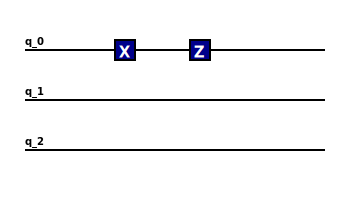

In [683]:
qc.draw()

In [684]:
x=100